# **Titanic**

### 1.Data Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.shape

(891, 12)

## **2.EDA**

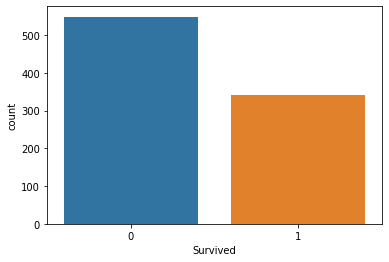

In [9]:
sns.countplot(x='Survived', data=df)

**Inference:** the not suvived data is more than survived data.

There is only a minor class imbalence. 

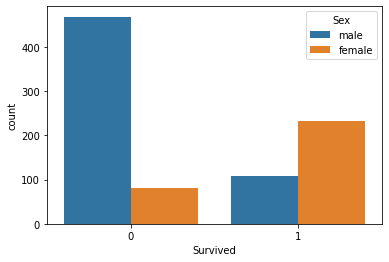

In [10]:
sns.countplot(x='Survived', hue='Sex', data=df)

**Inference:**Female death rate is higher than male 

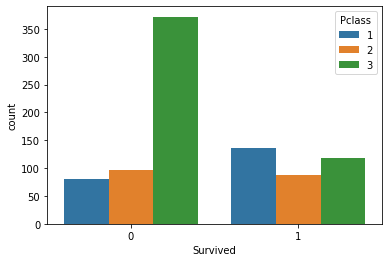

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=df)

**Inference:**Third class passengers are not highly survived in the accident.

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

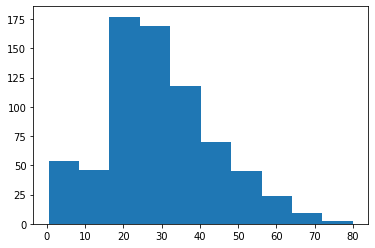

In [12]:
plt.hist(df['Age'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


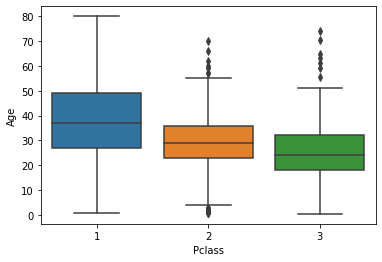

In [13]:
sns.boxplot(df['Pclass'], df['Age'])

**Inference:**The data of first class pasengers are equally distributed

There are some outliers present in 2 and 3 class pasenger data

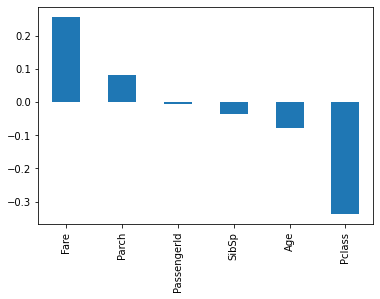

In [14]:
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar')

**Inference:** Pclass is highly correlated with the Survived data.

Where SibSp is least correlated with Survived data.

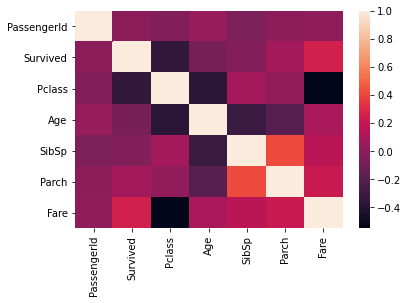

In [15]:
sns.heatmap(df.corr())

## **3.Feature engineering**

In [16]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Replacing the missing values with the corresponding column

In [17]:
def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]

    

    if pd.isnull(age):

        if(passenger_class == 1):

            return df[df['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return df[df['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return df[df['Pclass'] == 3]['Age'].mean()

    else:

        return age

In [18]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

Droping the cabin column since it is less correlated with Survived data

In [19]:
df.drop('Cabin', axis=1, inplace = True)

Droping rows with missing values

In [20]:
df.dropna(inplace=True)

In [21]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Droping the un wanted columns

In [22]:
df.drop(['Name', 'PassengerId', 'Ticket', 'Embarked'], axis = 1, inplace = True)

**Encoding the Sex column**

In [23]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


### Skewness and outlier detection 

In [25]:
df.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.507710
SibSp       3.691058
Parch       2.745160
Fare        4.801440
dtype: float64

Using Zscore methord to remove outlier

In [26]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (889, 7)
[[0.78696114 0.82520863 0.73534203 ... 0.43135024 0.47432585 0.50023975]
 [1.27071078 1.57221121 1.35991138 ... 0.43135024 0.47432585 0.78894661]
 [1.27071078 0.82520863 1.35991138 ... 0.47519908 0.47432585 0.48664993]
 ...
 [0.78696114 0.82520863 1.35991138 ... 0.43135024 2.00611934 0.17408416]
 [1.27071078 1.57221121 0.73534203 ... 0.47519908 0.47432585 0.0422126 ]
 [0.78696114 0.82520863 0.73534203 ... 0.47519908 0.47432585 0.49017322]]


In [27]:
threshold = 3
print(np.where(z > 3))

(array([ 13,  16,  25,  27,  50,  59,  67,  70,  85,  87,  95, 115, 117,
       118, 158, 163, 166, 170, 179, 181, 200, 232, 257, 260, 265, 277,
       298, 310, 323, 340, 359, 376, 379, 385, 436, 437, 437, 479, 492,
       526, 540, 541, 556, 566, 609, 629, 637, 671, 677, 678, 682, 685,
       688, 699, 715, 729, 735, 736, 741, 744, 773, 778, 786, 791, 812,
       823, 844, 848, 849, 856, 861, 883]), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5]))


In [28]:
after_zscore = df[(z < 3).all(axis=1)]

In [29]:
after_zscore.shape

(818, 7)

In [30]:
after_zscore.skew()

Survived    0.457268
Pclass     -0.639191
Sex        -0.671699
Age         0.400467
SibSp       1.975774
Parch       2.118544
Fare        2.342849
dtype: float64

In [31]:
df=after_zscore

Using Square root transformation methord to reduce Skewness

In [32]:
#calculating the square root for data

df1 = np.sqrt(df)

df1.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,1.732051,1.0,4.690416,1.000000,0.000000,2.692582
1,1.0,1.000000,0.0,6.164414,1.000000,0.000000,8.442944
2,1.0,1.732051,0.0,5.099020,0.000000,0.000000,2.815138
3,1.0,1.000000,0.0,5.916080,1.000000,0.000000,7.286975
4,0.0,1.732051,1.0,5.916080,0.000000,0.000000,2.837252
5,0.0,1.732051,1.0,5.014042,0.000000,0.000000,2.908316
6,0.0,1.000000,1.0,7.348469,0.000000,0.000000,7.201562
7,0.0,1.732051,1.0,1.414214,1.732051,1.000000,4.590752
8,1.0,1.732051,0.0,5.196152,0.000000,1.414214,3.336660
9,1.0,1.414214,0.0,3.741657,1.000000,0.000000,5.483685


In [33]:
df1.skew()

Survived    0.457268
Pclass     -0.758649
Sex        -0.671699
Age        -0.812475
SibSp       1.133008
Parch       1.719456
Fare        1.363890
dtype: float64

Skewness is reduced

In [34]:
df=df1

In [35]:
y = df['Survived']
x = df.drop('Survived', axis = 1)

### Test Train split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

Scaling using min max scaler

In [37]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [38]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [39]:
x_train.describe()

,0,1,2,3,4,5
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,0.665870,0.646789,0.622134,0.182627,0.159814,0.354385
std,0.410674,0.478333,0.171020,0.289833,0.326934,0.185622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.565826,0.000000,0.559435,0.000000,0.000000,0.218842
50%,1.000000,1.000000,0.606879,0.000000,0.000000,0.280805
75%,1.000000,1.000000,0.721850,0.577350,0.000000,0.410212
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Model Construction**

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

**RandomForestClassifier**

In [41]:
clf= RandomForestClassifier(n_estimators=700).fit(x_train, y_train)
predRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,predRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       108
         1.0       0.74      0.66      0.70        56

    accuracy                           0.80       164
   macro avg       0.79      0.77      0.78       164
weighted avg       0.80      0.80      0.80       164



In [42]:
randomforest_accu

0.8048780487804879

In [43]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, x_train, y_train, cv=10))

[0.87878788 0.75757576 0.78787879 0.89393939 0.83076923 0.8
 0.78461538 0.81538462 0.8        0.87692308]


In [44]:
from sklearn.model_selection import cross_val_score
randomforest_cv= cross_val_score(clf,x_train,y_train,scoring='accuracy', cv = 3).mean()
randomforest_cv

0.7935779816513762

**SVC**

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import LinearSVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)

#svc = LinearSVC(random_state=0, tol=1e-5)
#svc.fit(x_train, y_train.ravel()) 


svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
svc_acc=accuracy_score(y_test,predsvc)
print(svc_acc)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.823170731707317
[[98 10]
 [19 37]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       108
         1.0       0.79      0.66      0.72        56

    accuracy                           0.82       164
   macro avg       0.81      0.78      0.79       164
weighted avg       0.82      0.82      0.82       164



In [46]:
svc_cv=cross_val_score(svc,x,y,scoring='accuracy', cv = 10).mean()
svc_cv

0.8020325203252032

**DecisionTreeClassifier**

In [47]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

DTC.fit(x_train,y_train)

predDTC = DTC.predict(x_test)

reportDTC = classification_report(y_test,predDTC, output_dict = True)

crDTC = pd.DataFrame(reportDTC).transpose()
dtc_acc=accuracy_score(y_test,predDTC)
print(dtc_acc)
crDTC

0.7621951219512195


,precision,recall,f1-score,support
0.0,0.822430,0.814815,0.818605,108.000000
1.0,0.649123,0.660714,0.654867,56.000000
accuracy,0.762195,0.762195,0.762195,0.762195
macro avg,0.735776,0.737765,0.736736,164.000000
weighted avg,0.763252,0.762195,0.762694,164.000000


In [48]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(DTC,x,y,scoring='accuracy', cv = 10).mean()
dtc_cv

0.7860734718458295

**GaussianNB**

In [49]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

GNB.fit(x_train,y_train)

predGNB = GNB.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acc=accuracy_score(y_test,predGNB)
print(gnb_acc)
crGNB

0.8048780487804879


,precision,recall,f1-score,support
0.0,0.839286,0.870370,0.854545,108.000000
1.0,0.730769,0.678571,0.703704,56.000000
accuracy,0.804878,0.804878,0.804878,0.804878
macro avg,0.785027,0.774471,0.779125,164.000000
weighted avg,0.802231,0.804878,0.803039,164.000000


In [50]:
gnb_cv=cross_val_score(GNB,x,y,scoring='accuracy', cv = 10).mean()
gnb_cv

0.7715146040349292

**KNeighborsClassifier**

In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

predKNN = KNN.predict(x_test)

reportKNN = classification_report(y_test,predKNN, output_dict = True)

crKNN = pd.DataFrame(reportKNN).transpose()
knn_acc=accuracy_score(y_test,predKNN)
print(knn_acc)
crKNN

0.7926829268292683


,precision,recall,f1-score,support
0.0,0.824561,0.870370,0.846847,108.000000
1.0,0.720000,0.642857,0.679245,56.000000
accuracy,0.792683,0.792683,0.792683,0.792683
macro avg,0.772281,0.756614,0.763046,164.000000
weighted avg,0.788858,0.792683,0.789617,164.000000


In [52]:
knn_cv=cross_val_score(KNN,x,y,scoring='accuracy', cv = 10).mean()
knn_cv

0.8020475760313159

## **Hyper parameter tuning**

Performing hyper parameter tuning for 4 best model accoding the accuracy and cross validation score

In [53]:
#FINDING BEST RANDOM STATE

from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  DTC.fit(x_train,y_train)
  pred_train=DTC.predict(x_train)
  pred_test = DTC.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)
  #a[i]=c
  #print(f"At randome state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}")
  #print(f"At randome state {i}, the test accuracy is :- {r2_score(y_test,pred_test)}")

0 0.6850688976377954
least value 0 0.6850688976377954
1 0.9539093980954446
2 1.043941929133858
3 0.7798360198691253
4 0.8565605839920666
5 0.8359787499322383
6 0.8712570860027176
7 0.9504360637114522
8 0.927940632658072
9 0.7980953269618173
10 0.8371194211919852
11 0.8017482054129565
12 0.7913250024892433
13 0.8017482054129565
14 0.716040498341663
15 0.6982233028287703
16 0.9152670853093575
17 1.1346546301688987
18 0.8752007252007252
19 1.038176464615697
20 1.050928886407051
21 0.8886930876981404
22 0.7832082918115957
23 0.8530191699225637
24 0.9422187266272768
25 0.933260920992655
26 0.9015238949465257
27 0.9135786638987593
28 0.9540095088077643
29 0.922130905511811
30 0.9822066894798067
31 0.9165833768674494
32 1.0295018535026623
33 0.7605525169942912
34 0.8696559121906178
35 0.7669176824803223
36 0.9148249037783922
37 0.9602540616733058
38 1.0071506658715963
39 0.8711519368071675
40 0.7592648999898467
41 0.7642109828156343
42 0.7968942556151859
43 0.8581299212598428
44 0.87695389244

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

**DecisionTreeClassifier**

In [55]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy'],'splitter':['best', 'random']}

In [56]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [57]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [58]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}

In [59]:
# Create the some more parameters list
parameters_DT = {'max_depth': [6,7,8,9,10],
'min_samples_leaf': [2,3,4,5,6,7],
'min_samples_split': [2,3,4,5,6,7]} 

In [60]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters_DT,cv=5)

In [61]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                      

In [62]:
final_mod=DecisionTreeClassifier(criterion='entropy',splitter= 'random',random_state = 1,max_depth=10,min_samples_leaf= 6, min_samples_split= 7)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.7987804878048781


In [63]:
dt_cv=cross_val_score(final_mod,x,y,scoring='accuracy', cv = 10).mean()
dt_cv

0.7946552243300211

In [64]:
dt_final=pred
dt_finalmod=final_mod

**RandomForestClassifier**

In [65]:
#With Hyper Parameters Tuning
#2-2,Randomforest
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(x_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(x_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
rf_final=prediction
rf_finalmod=model1

Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.7926829268292683
Confusion Metrix:
 [[93 19]
 [15 37]]


In [66]:
rf_cv=cross_val_score(model1,x,y,scoring='accuracy', cv = 3).mean()
rf_cv

0.8117548301371831

**svm**

In [67]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(x_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(x_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
svm_final=prediction
svm_finalmod=model1

Best Hyper Parameters:
 {'C': 9, 'kernel': 'rbf'}
Accuracy: 0.8048780487804879
Confusion Metrix:
 [[95 19]
 [13 37]]


In [68]:
svc_cv=cross_val_score(model1,x,y,scoring='accuracy', cv = 10).mean()
svc_cv

0.8044564890093346

**KNeighborsClassifier**

In [69]:
#With Hyper Parameters Tuning
#2-4,kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(x_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(x_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
knn_final=prediction
knn_finalmod=model1

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.7987804878048781
Confusion Metrix:
 [[91 16]
 [17 40]]


In [70]:
knn_cv=cross_val_score(model1,x,y,scoring='accuracy', cv = 10).mean()
knn_cv

0.7995784402288468

## **Evaluation**

In [71]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [72]:
print("Random Forest")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_rfc = accuracy_score(y_test, rf_final)
print('Accuracy: %f' % accuracy_rfc)
# precision tp / (tp + fp)
precision_rfc = precision_score(y_test, rf_final)
print('Precision: %f' % precision_rfc)
# recall: tp / (tp + fn)
recall_rfc = recall_score(y_test, rf_final)
print('Recall: %f' % recall_rfc)
# f1: 2 tp / (2 tp + fp + fn)
f1_rfc = f1_score(y_test, rf_final)
print('F1 score: %f' % f1_rfc)


print("------------------------------------------")
print("Decision Tree")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_dt = accuracy_score(y_test, dt_final)
print('Accuracy: %f' % accuracy_dt)
# precision tp / (tp + fp)
precision_dt = precision_score(y_test, dt_final)
print('Precision: %f' % precision_dt)
# recall: tp / (tp + fn)
recall_dt = recall_score(y_test, dt_final)
print('Recall: %f' % recall_dt)
# f1: 2 tp / (2 tp + fp + fn)
f1_dt = f1_score(y_test, dt_final)
print('F1 score: %f' % f1_dt)

print("------------------------------------------")
print("KNN")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_knn = accuracy_score(y_test, knn_final)
print('Accuracy: %f' % accuracy_knn)
# precision tp / (tp + fp)
precision_knn = precision_score(y_test, knn_final)
print('Precision: %f' % precision_knn)
# recall: tp / (tp + fn)
recall_knn = recall_score(y_test, knn_final)
print('Recall: %f' % recall_knn)
# f1: 2 tp / (2 tp + fp + fn)
f1_knn = f1_score(y_test, knn_final)
print('F1 score: %f' % f1_knn)

print("------------------------------------------")
print("SVC")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_svc = accuracy_score(y_test, svm_final)
print('Accuracy: %f' % accuracy_svc)
# precision tp / (tp + fp)
precision_svc = precision_score(y_test, svm_final)
print('Precision: %f' % precision_svc)
# recall: tp / (tp + fn)
recall_svc = recall_score(y_test, svm_final)
print('Recall: %f' % recall_svc)
# f1: 2 tp / (2 tp + fp + fn)
f1_svc = f1_score(y_test, svm_final)
print('F1 score: %f' % f1_svc)

Random Forest
-----------------------------------------
Accuracy: 0.792683
Precision: 0.711538
Recall: 0.660714
F1 score: 0.685185
------------------------------------------
Decision Tree
-----------------------------------------
Accuracy: 0.798780
Precision: 0.744681
Recall: 0.625000
F1 score: 0.679612
------------------------------------------
KNN
-----------------------------------------
Accuracy: 0.798780
Precision: 0.701754
Recall: 0.714286
F1 score: 0.707965
------------------------------------------
SVC
-----------------------------------------
Accuracy: 0.804878
Precision: 0.740000
Recall: 0.660714
F1 score: 0.698113


### **When comparing accuracy and cross validation the best model is SVC **

In [73]:
import joblib
joblib.dump(rf_finalmod,"final model.pkl")

['final model.pkl']